In [3]:
print("bismillah")

bismillah


In [47]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Crimes_2023_to_Present_2025.csv")

# Step 1: Understand the Data
print("🔎 Shape of dataset:", df.shape)          # Rows, columns
print("\n📋 Column info:")
print(df.info())                                # Data types, non-null counts

print("\n🧮 Basic statistics:")
print(df.describe(include='all'))               # Summary stats for numeric & categorical

print("\n🔍 Sample records:")
print(df.head(10))                              # First 10 rows

print("\n🧾 Unique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

print("\n⚠️ Missing values per column:")
print(df.isnull().sum())

🔎 Shape of dataset: (722666, 22)

📋 Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722666 entries, 0 to 722665
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    722666 non-null  int64  
 1   Case Number           722666 non-null  object 
 2   IUCR                  722666 non-null  object 
 3   FBI Code              722666 non-null  object 
 4   Primary Type          722666 non-null  object 
 5   Description           722666 non-null  object 
 6   Location Description  719300 non-null  object 
 7   Date                  722666 non-null  object 
 8   Year                  722666 non-null  int64  
 9   Updated On            722666 non-null  object 
 10  Block                 722666 non-null  object 
 11  Latitude              719518 non-null  float64
 12  Longitude             719518 non-null  float64
 13  Location              719518 non-null  object 
 14  X C

In [48]:
df = df.dropna(subset=['Latitude', 'Longitude'])
#❌ If we fill fake numbers

# → Map becomes wrong
# → Clustering becomes wrong
# → Analysis becomes wrong

# ✅ Best solution: DROP those rows

# Why?

# Missing is tiny (~0.4%)

# Safer to remove than invent

In [49]:
df['Location Description'] = df['Location Description'].fillna("UNKNOWN")
# ❌ Wrong solution:

# Fill with "STREET" (most common)
# That will lie to the model.

# ✅ Correct solution:

# Model sees: "Ah, location not recorded"

# No false guessing

# Retains every case

In [50]:
df['Ward'].fillna(df['Ward'].median(), inplace=True)
# ✅ Best solution: MEDIAN

# Why not MEAN?
# Because geography values are not realistic to average.

C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_20800\443376744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ward'].fillna(df['Ward'].median(), inplace=True)


In [51]:
df['Community Area'].fillna(df['Community Area'].median(), inplace=True)
# ✅ Best solution: MEDIAN

# Why not MEAN?
# Because geography values are not realistic to average.

C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_20800\3636199647.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Community Area'].fillna(df['Community Area'].median(), inplace=True)


In [52]:
df.isnull().sum()


ID                      0
Case Number             0
IUCR                    0
FBI Code                0
Primary Type            0
Description             0
Location Description    0
Date                    0
Year                    0
Updated On              0
Block                   0
Latitude                0
Longitude               0
Location                0
X Coordinate            0
Y Coordinate            0
Beat                    0
District                0
Ward                    0
Community Area          0
Arrest                  0
Domestic                0
dtype: int64

In [53]:
df.describe()

,ID,Year,Latitude,Longitude,X Coordinate,Y Coordinate,Beat,District,Ward,Community Area
count,7.195180e+05,719518.000000,719518.000000,719518.000000,7.195180e+05,7.195180e+05,719518.000000,719518.000000,719518.000000,719518.000000
mean,1.344948e+07,2023.917860,41.846726,-87.668508,1.165403e+06,1.887444e+06,1153.232618,11.302582,23.142566,36.272202
std,7.019728e+05,0.797053,0.086872,0.059217,1.626352e+04,3.159088e+04,710.177911,7.097054,13.965869,21.577411
min,2.728300e+04,2023.000000,41.644590,-87.939733,1.091242e+06,1.813897e+06,111.000000,1.000000,1.000000,1.000000
25%,1.320879e+07,2023.000000,41.771743,-87.709639,1.154067e+06,1.860170e+06,532.000000,5.000000,10.000000,22.000000
50%,1.347805e+07,2024.000000,41.864494,-87.661386,1.167258e+06,1.893871e+06,1033.000000,10.000000,23.000000,32.000000
75%,1.374555e+07,2025.000000,41.909677,-87.626906,1.176766e+06,1.910279e+06,1732.000000,17.000000,34.000000,53.000000
max,1.402418e+07,2025.000000,42.022559,-87.524529,1.205119e+06,1.951517e+06,2535.000000,31.000000,50.000000,77.000000


In [54]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 719518 entries, 1 to 722665
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    719518 non-null  int64  
 1   Case Number           719518 non-null  object 
 2   IUCR                  719518 non-null  object 
 3   FBI Code              719518 non-null  object 
 4   Primary Type          719518 non-null  object 
 5   Description           719518 non-null  object 
 6   Location Description  719518 non-null  object 
 7   Date                  719518 non-null  object 
 8   Year                  719518 non-null  int64  
 9   Updated On            719518 non-null  object 
 10  Block                 719518 non-null  object 
 11  Latitude              719518 non-null  float64
 12  Longitude             719518 non-null  float64
 13  Location              719518 non-null  object 
 14  X Coordinate          719518 non-null  float64
 15  Y Coo

In [55]:
df['Arrest'].value_counts(normalize=True) * 100
# ✅ What this tells you:

# % of crimes that lead to arrest

# Class imbalance (important for ML later)

Arrest
False    86.1902
True     13.8098
Name: proportion, dtype: float64

In [56]:
df['Domestic'].value_counts(normalize=True) * 100
# Shows:

# Share of domestic crimes

# Important social pattern

Domestic
False    81.633816
True     18.366184
Name: proportion, dtype: float64

In [57]:
df['Primary Type'].value_counts().head(10)
# Most common crime types

# Helps identify major risk areas

Primary Type
THEFT                  164148
BATTERY                126321
CRIMINAL DAMAGE         80578
MOTOR VEHICLE THEFT     65234
ASSAULT                 64450
OTHER OFFENSE           46830
DECEPTIVE PRACTICE      44826
ROBBERY                 25175
BURGLARY                23922
WEAPONS VIOLATION       21246
Name: count, dtype: int64

In [58]:
df['Date'] = pd.to_datetime(df['Date'])


C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_20800\3386729631.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [59]:
df['District'].value_counts()

# district 31 has 40 crimes odd!

District
8     46981
12    44603
6     42007
1     40800
4     39664
11    38989
19    38266
18    37753
2     37246
25    36944
3     36937
9     31714
7     30054
10    29538
5     28599
14    25920
16    25444
24    24508
15    23599
22    22586
17    21851
20    15475
31       40
Name: count, dtype: int64

In [60]:
df['Community Area'].value_counts().head(10)


Community Area
25.0    35548
8.0     31788
28.0    30011
32.0    25387
43.0    24013
24.0    21763
23.0    19248
29.0    19074
71.0    18591
6.0     18379
Name: count, dtype: int64

In [61]:
df.groupby('District')['Arrest'].mean().sort_values(ascending=False)



District
11    0.270512
10    0.205058
1     0.179559
7     0.172390
15    0.164456
5     0.151719
31    0.150000
25    0.148874
9     0.139623
18    0.138506
6     0.127217
16    0.126356
24    0.124531
22    0.124015
20    0.122843
8     0.122709
3     0.122533
17    0.118576
14    0.117091
4     0.100872
2     0.092252
19    0.089505
12    0.084703
Name: Arrest, dtype: float64

In [62]:
df.corr(numeric_only=True)


,ID,Year,Latitude,Longitude,X Coordinate,Y Coordinate,Beat,District,Ward,Community Area,Arrest,Domestic
ID,1.000000,0.418384,0.016744,-0.000183,-0.000444,0.016777,0.009530,0.009567,0.011561,-0.013391,-0.012059,0.013709
Year,0.418384,1.000000,-0.002304,0.007701,0.007666,-0.002279,-0.006162,-0.006194,-0.001152,0.001932,0.042853,0.011504
Latitude,0.016744,-0.002304,1.000000,-0.521452,-0.532536,0.999995,0.637019,0.638110,0.736840,-0.756152,0.006170,-0.124252
Longitude,-0.000183,0.007701,-0.521452,1.000000,0.999914,-0.518643,-0.538910,-0.540128,-0.481421,0.206750,-0.039018,0.007389
X Coordinate,-0.000444,0.007666,-0.532536,0.999914,1.000000,-0.529749,-0.544307,-0.545532,-0.488826,0.216566,-0.038816,0.009289
Y Coordinate,0.016777,-0.002279,0.999995,-0.518643,-0.529749,1.000000,0.636194,0.637282,0.736448,-0.756871,0.006028,-0.124469
Beat,0.009530,-0.006162,0.637019,-0.538910,-0.544307,0.636194,1.000000,0.999813,0.659002,-0.478849,-0.008658,-0.060150
District,0.009567,-0.006194,0.638110,-0.540128,-0.545532,0.637282,0.999813,1.000000,0.659869,-0.479081,-0.008743,-0.060153
Ward,0.011561,-0.001152,0.736840,-0.481421,-0.488826,0.736448,0.659002,0.659869,1.000000,-0.544922,0.013389,-0.090583
Community Area,-0.013391,0.001932,-0.756152,0.206750,0.216566,-0.756871,-0.478849,-0.479081,-0.544922,1.000000,-0.000243,0.106781


fe

In [63]:
df['Hour'] = df['Date'].dt.hour
df['DayName'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df['DayNum'] = df['Date'].dt.weekday
df['IsWeekend'] = df['DayNum'].isin([5,6]).astype(int)


In [64]:
df['Hour'].value_counts().sort_index()


Hour
0     49489
1     24014
2     21253
3     18463
4     14977
5     13272
6     14014
7     18195
8     24637
9     29636
10    30640
11    31422
12    40859
13    32330
14    34316
15    39233
16    38501
17    38882
18    38404
19    37359
20    35882
21    33152
22    31666
23    28922
Name: count, dtype: int64

In [65]:
df['IsWeekend'].value_counts()



IsWeekend
0    511696
1    207822
Name: count, dtype: int64

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'   # or 'Autumn'
        
df['Season'] = df['Date'].dt.month.apply(get_season)


In [67]:
district_counts = df['District'].value_counts().reset_index()
district_counts.columns = ['District', 'CrimeCount']


In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
district_counts['DistrictCluster'] = kmeans.fit_predict(
    district_counts[['CrimeCount']]
)


In [69]:
df = df.merge(
    district_counts[['District','DistrictCluster']],
    on='District'
)


In [70]:
df['Lat_bin'] = pd.cut(df['Latitude'], bins=10)
df['Long_bin'] = pd.cut(df['Longitude'], bins=10)


In [71]:
df['Primary Type'].unique()

array(['THEFT', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'BATTERY',
       'OTHER OFFENSE', 'BURGLARY', 'CRIMINAL DAMAGE',
       'DECEPTIVE PRACTICE', 'NARCOTICS', 'ROBBERY', 'WEAPONS VIOLATION',
       'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER',
       'PUBLIC PEACE VIOLATION', 'CRIMINAL SEXUAL ASSAULT', 'SEX OFFENSE',
       'OFFENSE INVOLVING CHILDREN', 'STALKING', 'ARSON', 'INTIMIDATION',
       'HOMICIDE', 'PUBLIC INDECENCY', 'GAMBLING',
       'CONCEALED CARRY LICENSE VIOLATION', 'LIQUOR LAW VIOLATION',
       'PROSTITUTION', 'OBSCENITY', 'KIDNAPPING', 'HUMAN TRAFFICKING',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL'], dtype=object)

In [72]:
severity_map = {
    # Level 5 - Extreme
    'HOMICIDE': 5,
    'KIDNAPPING': 5,
    'HUMAN TRAFFICKING': 5,
    'CRIMINAL SEXUAL ASSAULT': 5,
    'OFFENSE INVOLVING CHILDREN': 5,
    'ARSON': 5,

    # Level 4 - Violent
    'ROBBERY': 4,
    'ASSAULT': 4,
    'BATTERY': 4,
    'WEAPONS VIOLATION': 4,
    'INTIMIDATION': 4,
    'STALKING': 4,

    # Level 3 - Serious
    'BURGLARY': 3,
    'MOTOR VEHICLE THEFT': 3,
    'NARCOTICS': 3,
    'OTHER NARCOTIC VIOLATION': 3,
    'SEX OFFENSE': 3,

    # Level 2 - Property & Public Order
    'THEFT': 2,
    'CRIMINAL DAMAGE': 2,
    'DECEPTIVE PRACTICE': 2,
    'PROSTITUTION': 2,
    'GAMBLING': 2,
    'LIQUOR LAW VIOLATION': 2,
    'PUBLIC PEACE VIOLATION': 2,
    'CRIMINAL TRESPASS': 2,

    # Level 1 - Minor
    'NON-CRIMINAL': 1,
    'OBSCENITY': 1,
    'PUBLIC INDECENCY': 1,
    'CONCEALED CARRY LICENSE VIOLATION': 1,
    'INTERFERENCE WITH PUBLIC OFFICER': 1,
    'OTHER OFFENSE': 1
}
df['CrimeSeverity'] = df['Primary Type'].map(severity_map)


In [73]:
df[df['CrimeSeverity'].isna()]['Primary Type'].unique()


array([], dtype=object)

In [74]:
df['CrimeSeverity'].value_counts().sort_index()


CrimeSeverity
1     49703
2    307697
3    110478
4    239211
5     12429
Name: count, dtype: int64

extra clean up 

In [75]:
district_counts = df['District'].value_counts()

valid_districts = district_counts[district_counts >= 500].index

df = df[df['District'].isin(valid_districts)]


In [76]:
df['District'].nunique()
# df['District'].value_counts()


22

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719478 entries, 0 to 719517
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    719478 non-null  int64         
 1   Case Number           719478 non-null  object        
 2   IUCR                  719478 non-null  object        
 3   FBI Code              719478 non-null  object        
 4   Primary Type          719478 non-null  object        
 5   Description           719478 non-null  object        
 6   Location Description  719478 non-null  object        
 7   Date                  719478 non-null  datetime64[ns]
 8   Year                  719478 non-null  int64         
 9   Updated On            719478 non-null  object        
 10  Block                 719478 non-null  object        
 11  Latitude              719478 non-null  float64       
 12  Longitude             719478 non-null  float64       
 13  Loca

In [78]:
# Display row 0 vertically
df.loc[0].T


ID                                           14018722
Case Number                                  JJ476993
IUCR                                             0710
FBI Code                                           06
Primary Type                                    THEFT
Description                  THEFT FROM MOTOR VEHICLE
Location Description                           STREET
Date                              2025-11-04 00:00:00
Year                                             2025
Updated On                     11/11/2025 03:41:33 PM
Block                             018XX N RICHMOND ST
Latitude                                    41.914795
Longitude                                  -87.700382
Location                (41.914795379, -87.700381792)
X Coordinate                                1156524.0
Y Coordinate                                1912177.0
Beat                                             1421
District                                           14
Ward                        

In [80]:
df = df.sample(500000, random_state=42)

In [81]:
df_enhanced = df.copy()

In [82]:
df_enhanced.to_csv("Crimes_2023_to_Present_2025_enhanced.csv", index=False) 

Feature selection:
| Column               | How to use                                                       |
| -------------------- | ---------------------------------------------------------------- |
| Primary Type         | Encode as numeric or severity score (already have CrimeSeverity) |
| Location Description | Encode categorically                                             |
| Latitude / Longitude | Keep numeric for geospatial analysis                             |
| Beat                 | Keep numeric (police beat info)                                  |
| Ward                 | Keep numeric                                                     |
| Community Area       | Keep numeric                                                     |
| Arrest               | Can keep if predicting arrest probability or outcome             |
| Domestic             | Keep if relevant for crime type analysis                         |
| Hour                 | Keep numeric (from Date)                                         |
| DayName              | Encode as categorical (Mon–Sun)                                  |
| Month                | Encode as categorical or cyclical (1–12)                         |
| DayNum               | Keep numeric (day of month)                                      |
| IsWeekend            | Keep binary                                                      |
| Season               | Encode as categorical                                            |
| DistrictCluster      | Keep numeric cluster info                                        |
| Lat_bin / Long_bin   | Optional — could encode categorical if useful                    |
| CrimeSeverity        | Keep numeric target or feature for risk score                    |


In [1]:
import pandas as pd
df = pd.read_csv("Crimes_2023_to_Present_2025_enhanced.csv")
df.info()
df= df.sample(20000, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    500000 non-null  int64  
 1   Case Number           500000 non-null  object 
 2   IUCR                  500000 non-null  object 
 3   FBI Code              500000 non-null  object 
 4   Primary Type          500000 non-null  object 
 5   Description           500000 non-null  object 
 6   Location Description  500000 non-null  object 
 7   Date                  500000 non-null  object 
 8   Year                  500000 non-null  int64  
 9   Updated On            500000 non-null  object 
 10  Block                 500000 non-null  object 
 11  Latitude              500000 non-null  float64
 12  Longitude             500000 non-null  float64
 13  Location              500000 non-null  object 
 14  X Coordinate          500000 non-null  float64
 15  

In [63]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [
    'Primary Type', 'Location Description',
    'DayName', 'Month', 'Season',
    'Lat_bin', 'Long_bin'
]

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [64]:
from sklearn.preprocessing import StandardScaler

num_cols = [
    'Latitude','Longitude','Beat','Ward',
    'Community Area','Hour','DayNum',
    'DistrictCluster','CrimeSeverity'
]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [65]:
X_geo =df[['Latitude', 'Longitude']].values #since clustering works best on numpy array

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

for k in range(2,11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_geo)

    sil = silhouette_score(X_geo, labels)
    db = davies_bouldin_score(X_geo, labels)

    print(f"K = {k} | Silhouette = {sil:.3f} | Davies-Bouldin = {db:.3f}")


K = 2 | Silhouette = 0.451 | Davies-Bouldin = 0.825
K = 3 | Silhouette = 0.425 | Davies-Bouldin = 0.869
K = 4 | Silhouette = 0.412 | Davies-Bouldin = 0.846
K = 5 | Silhouette = 0.402 | Davies-Bouldin = 0.831
K = 6 | Silhouette = 0.401 | Davies-Bouldin = 0.825
K = 7 | Silhouette = 0.400 | Davies-Bouldin = 0.847
K = 8 | Silhouette = 0.402 | Davies-Bouldin = 0.804
K = 9 | Silhouette = 0.406 | Davies-Bouldin = 0.789
K = 10 | Silhouette = 0.417 | Davies-Bouldin = 0.771


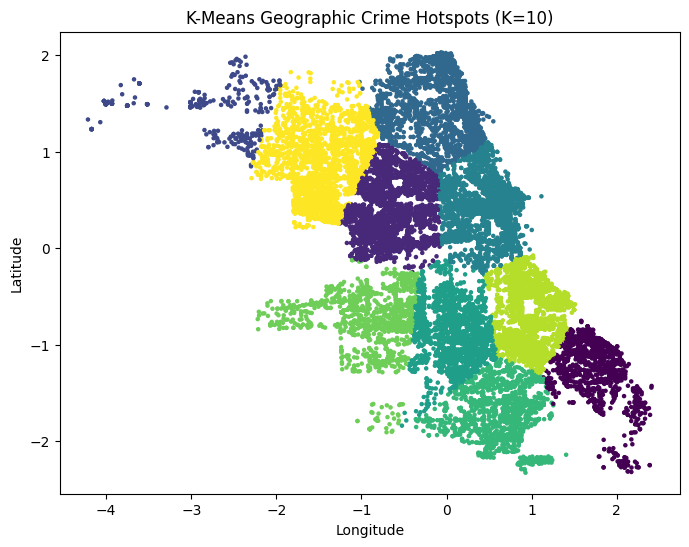

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select geo data
X_geo = df[['Latitude','Longitude']]

# KMeans with best K
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
df['KMeans_cluster'] = kmeans.fit_predict(X_geo)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(df['Longitude'], df['Latitude'],
            c=df['KMeans_cluster'],
            s=5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-Means Geographic Crime Hotspots (K=10)")
plt.show()


2025/12/03 18:01:43 INFO mlflow.tracking.fluent: Experiment with name 'Geo Clustering Experiment' does not exist. Creating a new experiment.
2025/12/03 18:01:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/03 18:01:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


K=10 | Silhouette=0.417 | Davies-Bouldin=0.771


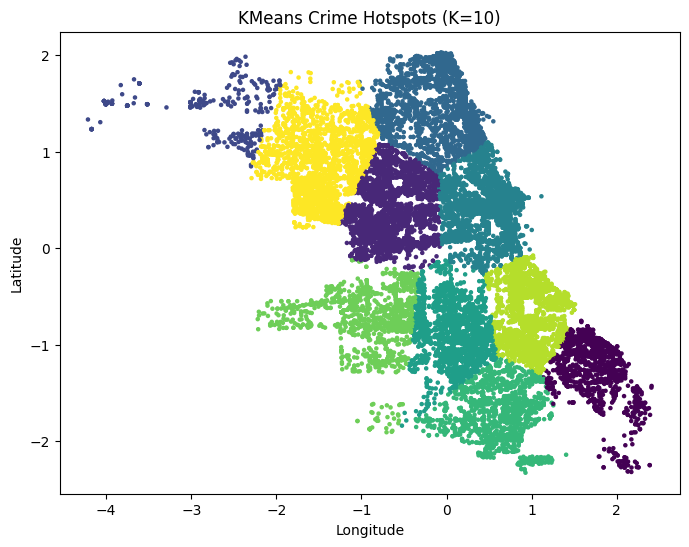

In [2]:
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# ------------------------------
# Load & Preprocess Data
# ------------------------------
df = pd.read_csv("Crimes_2023_to_Present_2025_enhanced.csv").sample(20000, random_state=42)

# Encoding categorical columns
cat_cols = ['Primary Type', 'Location Description', 'DayName', 'Month', 'Season', 'Lat_bin', 'Long_bin']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Scaling numerical values
num_cols = ['Latitude','Longitude','Beat','Ward','Community Area','Hour','DayNum','DistrictCluster','CrimeSeverity']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# ------------------------------
# K-Means Experiment (MLflow)
# ------------------------------
mlflow.set_experiment("Geo Clustering Experiment")

X_geo = df[['Latitude', 'Longitude']].values
chosen_k = 10

with mlflow.start_run(run_name=f"KMeans_k_{chosen_k}"):

    model = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
    labels = model.fit_predict(X_geo)

    df['KMeans_cluster'] = labels

    # Metrics
    sil = silhouette_score(X_geo, labels)
    db_score = davies_bouldin_score(X_geo, labels)

    # Log to MLflow
    mlflow.log_param("model_type", "KMeans")
    mlflow.log_param("k_clusters", chosen_k)
    mlflow.log_param("random_state", 42)

    mlflow.log_metric("silhouette_score", sil)
    mlflow.log_metric("davies_bouldin_score", db_score)

    # Save trained model
    mlflow.sklearn.log_model(model, "KMeans_Model")

    print(f"K={chosen_k} | Silhouette={sil:.3f} | Davies-Bouldin={db_score:.3f}")

# ------------------------------
# Visualization
# ------------------------------
plt.figure(figsize=(8,6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['KMeans_cluster'], s=5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"KMeans Crime Hotspots (K={chosen_k})")
plt.show()


In [66]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score



# 3. Apply DBSCAN
db = DBSCAN(
    eps=0.05,            # adjust this
    min_samples=72     # adjust based on density
)
labels = db.fit_predict(X_geo)

# 4. Store labels
mask = labels != -1
df['DBSCAN_cluster'] = labels
sil = silhouette_score(X_geo[mask], labels[mask])
db = davies_bouldin_score(X_geo[mask], labels[mask])
print(f"DBSCAN | Silhouette = {sil:.3f} | Davies-Bouldin = {db:.3f}")


DBSCAN | Silhouette = 0.623 | Davies-Bouldin = 0.271


In [67]:

db = DBSCAN(eps=0.05, min_samples=72).fit(X_geo)
labels = db.labels_
cluster_count = len(set(labels)) - (1 if -1 in labels else 0)
noise_ratio = (labels == -1).mean()
print(f"eps=0.05, min_samples=70 -> clusters={cluster_count}, noise={noise_ratio:.2%}")

eps=0.05, min_samples=70 -> clusters=10, noise=88.78%


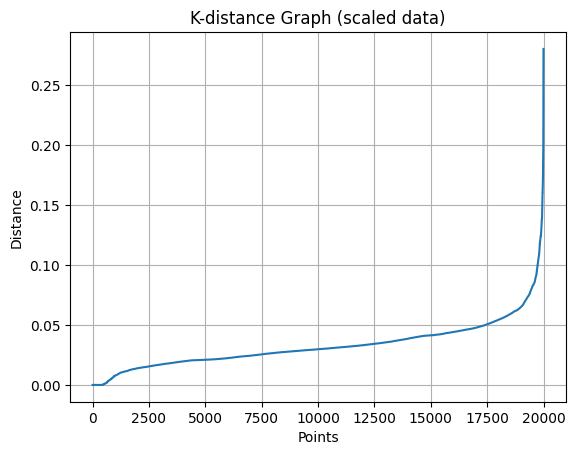

In [9]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

X_geo = df[['Latitude','Longitude']]

nbrs = NearestNeighbors(n_neighbors=10)
nbrs.fit(X_geo)

distances, indices = nbrs.kneighbors(X_geo)

d = np.sort(distances[:,9])

plt.plot(d)
plt.title("K-distance Graph (scaled data)")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()
plt.show()


2025/12/03 18:05:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


DBSCAN | Silhouette=0.623 | Davies-Bouldin=0.271


2025/12/03 18:05:39 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/12/03 18:05:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


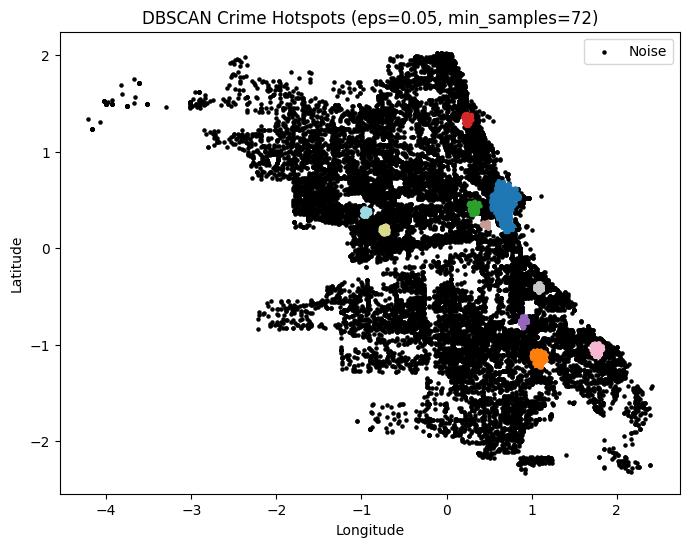

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# ------------------------------
# DBSCAN Experiment (MLflow)
# ------------------------------
mlflow.set_experiment("Geo Clustering Experiment")

eps_value = 0.05
min_samples_value = 72

with mlflow.start_run(run_name=f"DBSCAN_eps_{eps_value}_min_{min_samples_value}"):

    model = DBSCAN(eps=eps_value, min_samples=min_samples_value)
    labels = model.fit_predict(X_geo)

    df['DBSCAN_cluster'] = labels

    # Filter noise for metrics
    mask = labels != -1

    if mask.sum() > 0:  # Avoid error if all are noise
        silhouette = silhouette_score(X_geo[mask], labels[mask])
        davies = davies_bouldin_score(X_geo[mask], labels[mask])
    else:
        silhouette = None
        davies = None

    # Log parameters
    mlflow.log_param("model_type", "DBSCAN")
    mlflow.log_param("eps", eps_value)
    mlflow.log_param("min_samples", min_samples_value)

    # Log metrics
    if silhouette is not None:
        mlflow.log_metric("silhouette_score", silhouette)
    if davies is not None:
        mlflow.log_metric("davies_bouldin_score", davies)

    print(f"DBSCAN | Silhouette={silhouette:.3f} | Davies-Bouldin={davies:.3f}")

    # Save cluster labels


    # Save trained model (DBSCAN supports logging)
    mlflow.sklearn.log_model(model, "DBSCAN_Model")

# ------------------------------
# Visualization
# ------------------------------
plt.figure(figsize=(8,6))
noise = df['DBSCAN_cluster'] == -1
clusters = df[~noise]

# Noise in black
plt.scatter(df.loc[noise, 'Longitude'], df.loc[noise, 'Latitude'], color='black', s=5, label='Noise')

# Clusters in color
plt.scatter(clusters['Longitude'], clusters['Latitude'],
            c=clusters['DBSCAN_cluster'], cmap='tab20', s=5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"DBSCAN Crime Hotspots (eps={eps_value}, min_samples={min_samples_value})")
plt.legend()
plt.show()


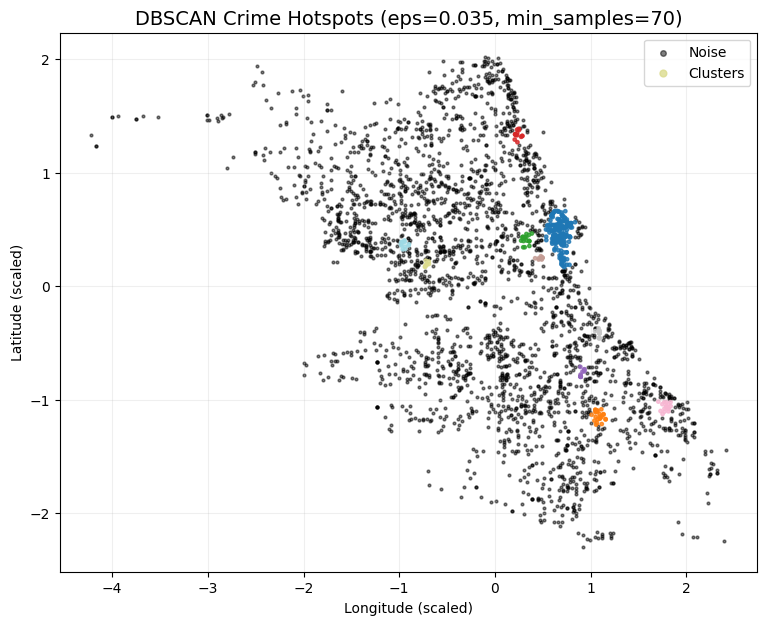

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))

# Separate noise and clusters
noise = df['DBSCAN_cluster'] == -1
clusters = df[~noise]

# Plot noise in black
plt.scatter(
    df.loc[noise,'Longitude'],
    df.loc[noise,'Latitude'],
    c="black", s=4, alpha=0.5, label="Noise"
)

# Plot valid clusters in color
plt.scatter(
    clusters['Longitude'],
    clusters['Latitude'],
    c=clusters['DBSCAN_cluster'],
    cmap="tab20",
    s=6, alpha=0.8, label="Clusters"
)

plt.title("DBSCAN Crime Hotspots (eps=0.035, min_samples=70)", fontsize=14)
plt.xlabel("Longitude (scaled)")
plt.ylabel("Latitude (scaled)")
plt.legend(markerscale=2)
plt.grid(alpha=0.2)

plt.show()


In [6]:
df = df.sample(3000, random_state=42)

In [70]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Use scaled geographic coordinates
X_geo = df[['Latitude', 'Longitude']]

# 1. Compute linkage matrix (Ward's method)
linked = linkage(X_geo, method='ward')

# 2. Plot dendrogram (show top levels to avoid clutter)
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    truncate_mode='level',  # Only top levels
    p=20,                   # Show 20 levels
    leaf_rotation=90,
    leaf_font_size=10,
    show_contracted=True
)
plt.title("Hierarchical Clustering Dendrogram (Crime Zones)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


: 

In [8]:
# t = distance threshold to cut dendrogram
df['HierCluster'] = fcluster(linked, t=10, criterion='distance')


In [9]:
# Mask to remove single-cluster cases
if df['HierCluster'].nunique() > 1:
    sil = silhouette_score(X_geo, df['HierCluster'])
    db_score = davies_bouldin_score(X_geo, df['HierCluster'])
    print(f"Hierarchical Clustering | Silhouette = {sil:.3f} | Davies-Bouldin = {db_score:.3f}")
else:
    print("Only 1 cluster formed, metrics cannot be computed.")


Hierarchical Clustering | Silhouette = 0.356 | Davies-Bouldin = 0.754


2025/12/03 18:09:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



Hierarchical Clustering Results:
Clusters formed: 11
Silhouette Score: 0.351
Davies-Bouldin Score: 0.851


2025/12/03 18:09:08 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/12/03 18:09:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


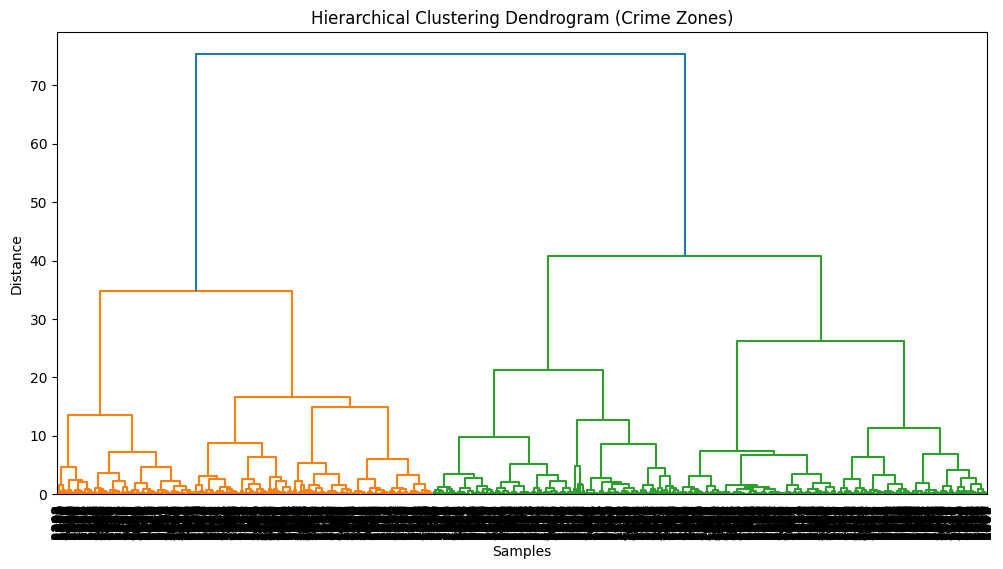

In [ ]:
import pandas as pd
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score

# ------------------------------
# Sample dataset (optional for speed)
# ------------------------------
df = df.sample(3000, random_state=42)

# ------------------------------
# Feature Selection
# ------------------------------
X_geo = df[['Latitude', 'Longitude']]

# ------------------------------
# MLflow Experiment Setup
# ------------------------------
mlflow.set_experiment("Geo Clustering Experiment")

# Hyperparameters
linkage_method = "ward"
distance_threshold = 10

with mlflow.start_run(run_name="Hierarchical_Clustering"):

    # ------------------------------
    # Model Training
    # ------------------------------
    linked = linkage(X_geo, method=linkage_method)

    df['HierCluster'] = fcluster(
        linked,
        t=distance_threshold,
        criterion='distance'
    )

    # ------------------------------
    # Metric Calculation (only if >1 cluster)
    # ------------------------------
    if df['HierCluster'].nunique() > 1:
        silhouette = silhouette_score(X_geo, df['HierCluster'])
        davies = davies_bouldin_score(X_geo, df['HierCluster'])
    else:
        silhouette = None
        davies = None

    # ------------------------------
    # MLflow Logging
    # ------------------------------
    mlflow.log_param("model_type", "HierarchicalClustering")
    mlflow.log_param("linkage_method", linkage_method)
    mlflow.log_param("distance_threshold", distance_threshold)

    if silhouette is not None:
        mlflow.log_metric("silhouette_score", silhouette)
    if davies is not None:
        mlflow.log_metric("davies_bouldin_score", davies)

    print(f"\nHierarchical Clustering Results:")
    print(f"Clusters formed: {df['HierCluster'].nunique()}")
    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Davies-Bouldin Score: {davies:.3f}")

    # Save Model

    mlflow.sklearn.log_model(linked, "Hierarchical_Model")

# ------------------------------
# Visualization
# ------------------------------
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    truncate_mode='level',  
    p=20,
    leaf_rotation=90,
    leaf_font_size=10,
    show_contracted=True
)
plt.title("Hierarchical Clustering Dendrogram (Crime Zones)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


temporal clustering

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# ---- Load Data ----
df = pd.read_csv("Crimes_2023_to_Present_2025_enhanced.csv").sample(20000, random_state=42)

# ---- Extract datetime components ----
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.dayofweek       # 0=Mon, 6=Sun
df['Month'] = df['Date'].dt.month
df['IsWeekend'] = df['Day'].apply(lambda x: 1 if x>=5 else 0)

# ---- Prepare features for clustering ----
X_time = df[['Hour', 'Day', 'Month', 'IsWeekend']]

# ---- Scale numeric variables ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_time)

# ---- Find best K ----
scores = {}
for k in range(3,6):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_scaled)
    scores[k] = silhouette_score(X_scaled, labels)

print("Silhouette Scores:", scores)

# ---- Use best K (5 based on your result) ----
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['TemporalCluster'] = kmeans.fit_predict(X_scaled)


Silhouette Scores: {3: 0.32148546588349813, 4: 0.32552445814142766, 5: 0.3167382073204369}


In [7]:
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# ------------------------------
# Load Dataset
# ------------------------------
df = pd.read_csv("Crimes_2023_to_Present_2025_enhanced.csv").sample(20000, random_state=42)

# ------------------------------
# Feature Engineering (Temporal)
# ------------------------------
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.dayofweek    # 0=Monday
df['Month'] = df['Date'].dt.month
df['IsWeekend'] = df['Day'].apply(lambda x: 1 if x >= 5 else 0)

# Selected temporal features
X_time = df[['Hour', 'Day', 'Month', 'IsWeekend']]

# ------------------------------
# Scaling
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_time)

# ------------------------------
# MLflow Tracking
# ------------------------------
mlflow.set_experiment("Crime Clustering Experiment")

# Find best K
best_k = None
best_score = -1

for k in range(3, 6):
    with mlflow.start_run(run_name=f"Temporal_KMeans_k={k}"):

        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = model.fit_predict(X_scaled)

        # Calculate metrics
        silhouette = silhouette_score(X_scaled, labels)

        # Log parameters & metrics
        mlflow.log_param("model_type", "KMeans Temporal")
        mlflow.log_param("k_clusters", k)
        mlflow.log_metric("silhouette_score", silhouette)

        # Save best model
        if silhouette > best_score:
            best_score = silhouette
            best_k = k
            best_model = model

        print(f"K={k} | Silhouette Score={silhouette:.3f}")

# After loop, log best model
with mlflow.start_run(run_name=f"Best Temporal KMeans (k={best_k})"):

    df['TemporalCluster'] = best_model.predict(X_scaled)

    mlflow.log_param("Best_K", best_k)
    mlflow.log_metric("Best_Silhouette", best_score)
    
    # Log final trained model
    mlflow.sklearn.log_model(best_model, "Best_Temporal_KMeans_Model")

print(f"\nBest K Value: {best_k} | Silhouette Score: {best_score:.3f}")


2025/12/03 18:14:32 INFO mlflow.tracking.fluent: Experiment with name 'Crime Clustering Experiment' does not exist. Creating a new experiment.


K=3 | Silhouette Score=0.321
K=4 | Silhouette Score=0.326


2025/12/03 18:14:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


K=5 | Silhouette Score=0.317


2025/12/03 18:14:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Best K Value: 4 | Silhouette Score: 0.326


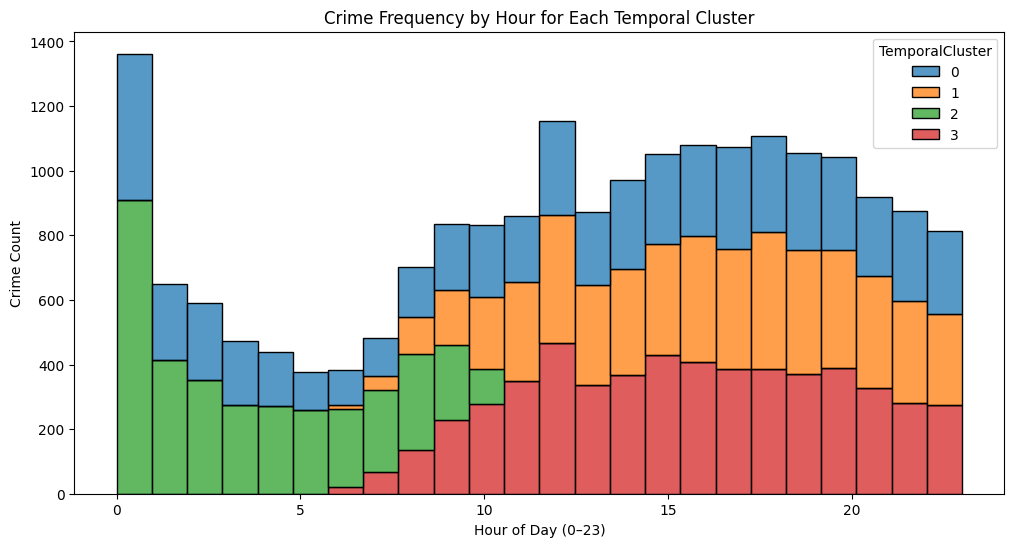

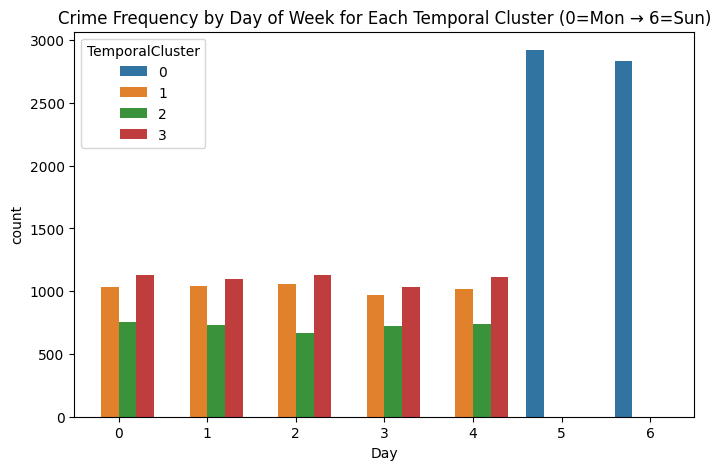

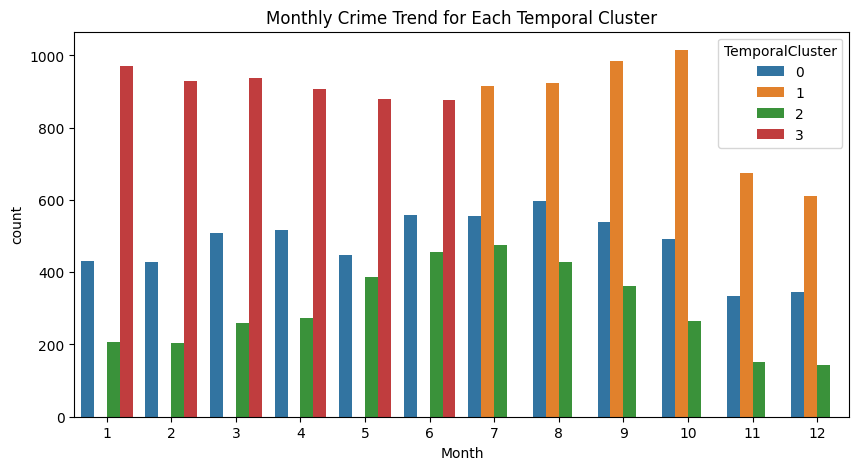

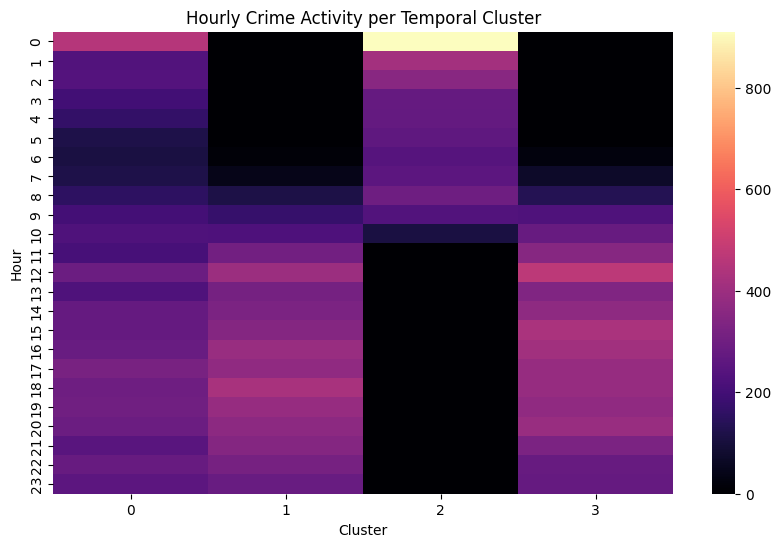

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Hour', hue='TemporalCluster', bins=24, multiple='stack', palette="tab10")
plt.title("Crime Frequency by Hour for Each Temporal Cluster")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Crime Count")
plt.show()


# 2. Crime by day of week
plt.figure(figsize=(8,5))
sns.countplot(x=df['Day'], hue=df['TemporalCluster'], palette="tab10")
plt.title("Crime Frequency by Day of Week for Each Temporal Cluster (0=Mon → 6=Sun)")
plt.show()

# 3. Crime by month
plt.figure(figsize=(10,5))
sns.countplot(x=df['Month'], hue=df['TemporalCluster'], palette="tab10")
plt.title("Monthly Crime Trend for Each Temporal Cluster")
plt.show()

# 4. Hour vs Day heatmap
pivot = pd.crosstab(df['Hour'], df['TemporalCluster'])

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="magma")
plt.title("Hourly Crime Activity per Temporal Cluster")
plt.xlabel("Cluster")
plt.ylabel("Hour")
plt.show()




## 🔍 **Chart 1: Crime Frequency by Hour for Each Cluster**

What it shows:

* The stacked bars represent **how often crimes occur at each hour**, grouped by cluster.
* Each color = **a time-crime behavior group discovered by K-Means.**

Interpretation:

* There is a **strong crime spike around 0:00–1:00 AM** — dominated by **Cluster 0**, meaning late-night unlawful activity is significant.
* Crime drops early morning (3–6 AM), where **Cluster 2 dominates**, showing only specific crime types remain active.
* Crimes rise again from **8 AM onward**, shifting dominance to **Clusters 3 and 4**, representing work-hour and afternoon crime patterns.
* There is another visible increase from **4–9 PM**, suggesting evening crimes (rush hour + after work).

📌 **Conclusion:**
Crime is **not evenly distributed across the day** — there are **three major risk periods:**

1. **Midnight peak (Cluster 0)**
2. **Morning to afternoon activity (Cluster 4 & 3)**
3. **Evening rush hour (Cluster 1)**

---

## 📅 **Chart 2: Crime by Day of Week per Cluster**

* The bars show which clusters dominate during weekdays vs weekends.

Interpretation:

* **Cluster 4 dominates weekends (Saturday & Sunday)** — this is a **weekend-driven crime group (nightlife, crowd behavior, public disturbances).**
* **Clusters 1 and 3 are evenly distributed across weekdays**, showing working-hour crime behavior.
* **Cluster 0 appears on weekends and Friday nights**, supporting nighttime party-related offenses.

📌 **Conclusion:**
Weekends show a **higher volume of crime**, especially at night — implying police deployment should increase on **Friday and Saturday nights.**

---

## 📆 **Chart 3: Monthly Crime Trend for Each Cluster**

What this shows:

* Distribution of crime across months grouped by cluster.

Interpretation:

* **Cluster 1 peaks between July–September**, suggesting **summer seasonal crime increase** (more public activity).
* **Cluster 3 (afternoon crimes) is consistently high across all months**, meaning everyday routine crimes do not depend much on season.
* **Cluster 2 decreases toward winter months**, showing morning crimes drop during colder months.

📌 **Conclusion:**
Crime trends show a **seasonal pattern** — **summer months have higher criminal activity**, especially evening/late-night crimes.

---

## 🔥 **Chart 4: Heatmap (Hourly Crime Activity per Cluster)**

What it shows:

* The darker the cell → the more crime during that hour for that cluster.

Interpretation:

* **Cluster 0 shows peak activity around midnight (0–2).**
* **Cluster 1 peaks around evening (16–21).**
* **Cluster 2 peaks early morning (6–10).**
* **Cluster 3 peaks midday to afternoon (11–17).**
* **Cluster 4 is dominant across night on weekends.**

📌 **Conclusion:**
The heatmap visually confirms that each temporal cluster represents a **unique timing behavior pattern**, proving the clustering worked and crime follows **time-of-day behavioral cycles.**

---

---

## 🧠 Final Summary 

> The temporal clustering analysis revealed clear, repeatable crime patterns based on time of day, day of week, and seasonal variation.
> Five distinct behavioral crime clusters emerged, showing that crime follows predictable **daily, weekly, and seasonal rhythms**.
>
> * **Late-night crime (Cluster 0)** peaks at midnight and weekends.
> * **Rush-hour crime (Cluster 1)** increases in evenings.
> * **Morning crime (Cluster 2)** occurs during early hours and declines seasonally.
> * **Routine daytime crime (Cluster 3)** remains steady across weekdays.
> * **Weekend pattern crime (Cluster 4)** is highest during Saturdays and Sundays.
>
> These insights can directly help optimize **patrol allocation, emergency readiness, and preventive surveillance during high-risk time windows.**




🔍 PEAK CRIME TREND SUMMARY
Top Crime Hours Crime Counts at Those Hours Highest Crime Season  Season Crime Count
    [0, 12, 15]       [34391, 28405, 27352]               Summer              142614


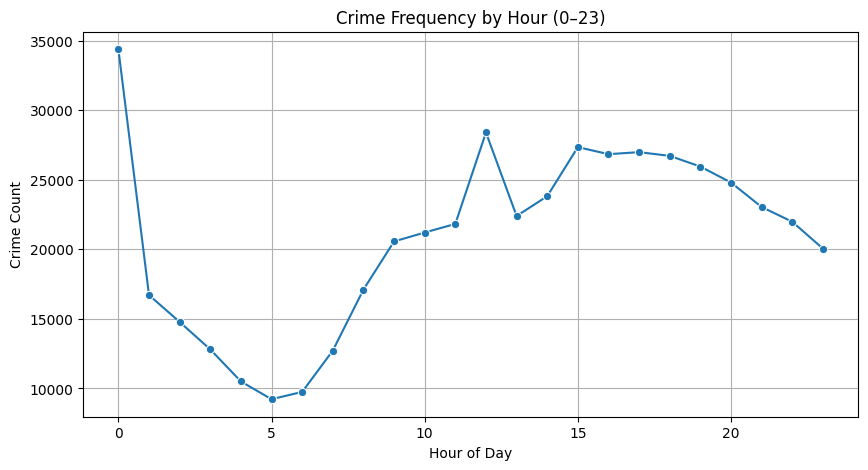

C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_21636\3955656304.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_peak.index, y=day_peak.values, palette="viridis")


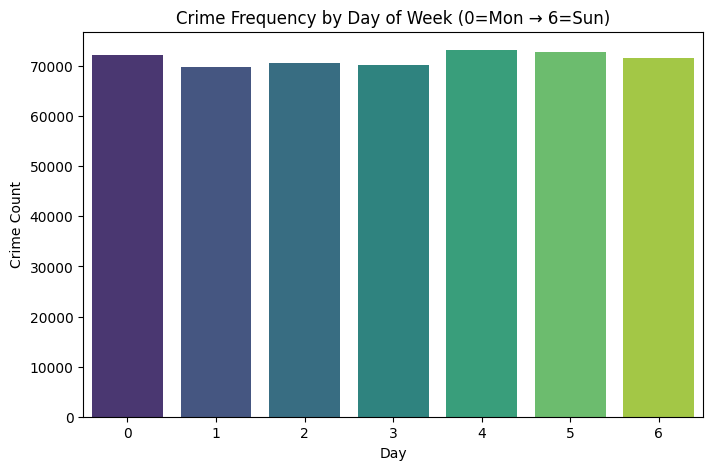

C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_21636\3955656304.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_peak.index, y=monthly_peak.values, palette="coolwarm")


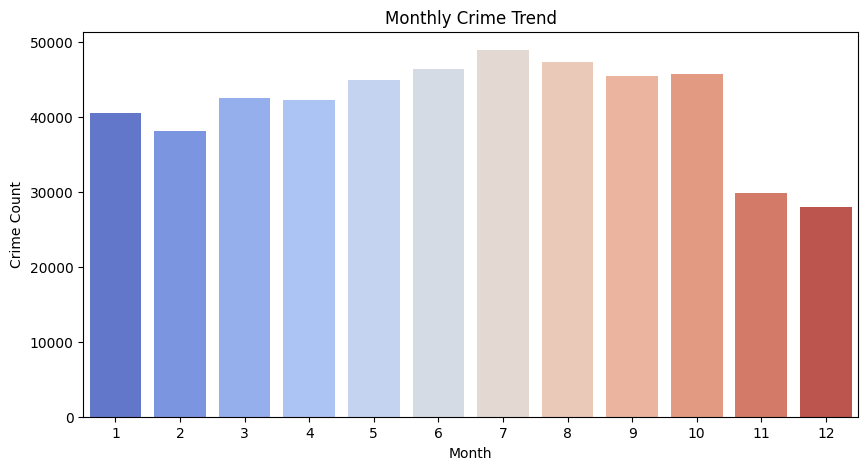

C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_21636\3955656304.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_peak.index, y=season_peak.values, palette="autumn")


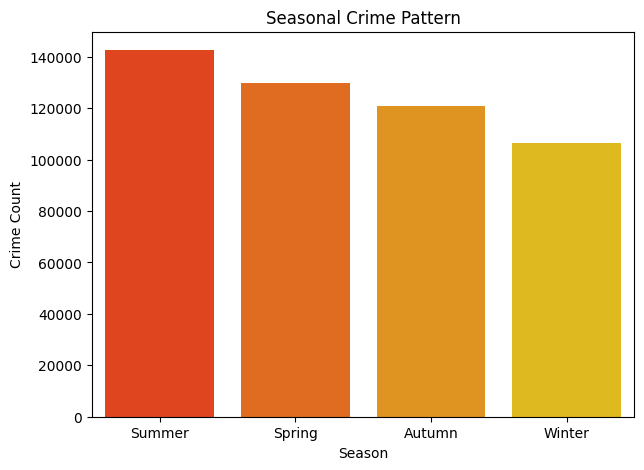

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# 1️⃣ Load & Prepare Date Fields
# ---------------------------
df = pd.read_csv("Crimes_2023_to_Present_2025_enhanced.csv")

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.dayofweek  # 0=Mon → 6=Sun
df['Month'] = df['Date'].dt.month

# ---------------------------
# 2️⃣ Map Seasons
# ---------------------------
def get_season(month):
    if month in [12,1,2]: return "Winter"
    elif month in [3,4,5]: return "Spring"
    elif month in [6,7,8]: return "Summer"
    else: return "Autumn"

df['Season'] = df['Month'].apply(get_season)

# ---------------------------
# 3️⃣ Identify Peak Crime Times
# ---------------------------

hourly_peak = df['Hour'].value_counts().sort_index()
day_peak = df['Day'].value_counts().sort_index()
monthly_peak = df['Month'].value_counts().sort_index()
season_peak = df['Season'].value_counts()

# Display summary table
# ---- Summary (fixed to avoid length mismatch error) ----

summary = pd.DataFrame({
    "Top Crime Hours": [list(hourly_peak.nlargest(3).index)],
    "Crime Counts at Those Hours": [list(hourly_peak.nlargest(3).values)],
    "Highest Crime Season": [season_peak.idxmax()],
    "Season Crime Count": [season_peak.max()]
})

print("\n🔍 PEAK CRIME TREND SUMMARY")
print(summary.to_string(index=False))


# ---------------------------
# 4️⃣ Visualizations
# ---------------------------

# 🔹 Crime Frequency by Hour
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_peak.index, y=hourly_peak.values, marker="o")
plt.title("Crime Frequency by Hour (0–23)")
plt.xlabel("Hour of Day")
plt.ylabel("Crime Count")
plt.grid()
plt.show()

# 🔹 Crime Frequency by Day of Week
plt.figure(figsize=(8,5))
sns.barplot(x=day_peak.index, y=day_peak.values, palette="viridis")
plt.title("Crime Frequency by Day of Week (0=Mon → 6=Sun)")
plt.xlabel("Day")
plt.ylabel("Crime Count")
plt.show()

# 🔹 Monthly Crime Trend
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_peak.index, y=monthly_peak.values, palette="coolwarm")
plt.title("Monthly Crime Trend")
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.show()

# 🔹 Seasonal Crime Pattern
plt.figure(figsize=(7,5))
sns.barplot(x=season_peak.index, y=season_peak.values, palette="autumn")
plt.title("Seasonal Crime Pattern")
plt.xlabel("Season")
plt.ylabel("Crime Count")
plt.show()


In [72]:
# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract raw temporal columns (if not already)
df['Hour_raw'] = df['Date'].dt.hour
df['Day_raw'] = df['Date'].dt.dayofweek  # 0=Mon → 6=Sun
df['Month_raw'] = df['Date'].dt.month
df['IsWeekend'] = df['Day_raw'].apply(lambda x: 1 if x >= 5 else 0)

# Use existing Season column
df['Season'] = df['Season'].astype(str)

# Function to safely compute mode
def get_mode(series):
    return series.mode().iloc[0]

# Create temporal behavior pattern per crime category
crime_time_features = df.groupby('Primary Type')[['Hour_raw','Day_raw','Month_raw','IsWeekend']].agg(get_mode)
crime_time_features.head()


,Hour_raw,Day_raw,Month_raw,IsWeekend
Primary Type,,,,
ARSON,1,0,6,0
ASSAULT,15,0,7,0
BATTERY,0,6,7,0
BURGLARY,0,4,10,0
CONCEALED CARRY LICENSE VIOLATION,0,6,3,0


In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
crime_scaled = scaler.fit_transform(crime_time_features)

kmeans_time = KMeans(n_clusters=5, random_state=42, n_init=10)
crime_time_features['TimeBehaviorCluster'] = kmeans_time.fit_predict(crime_scaled)


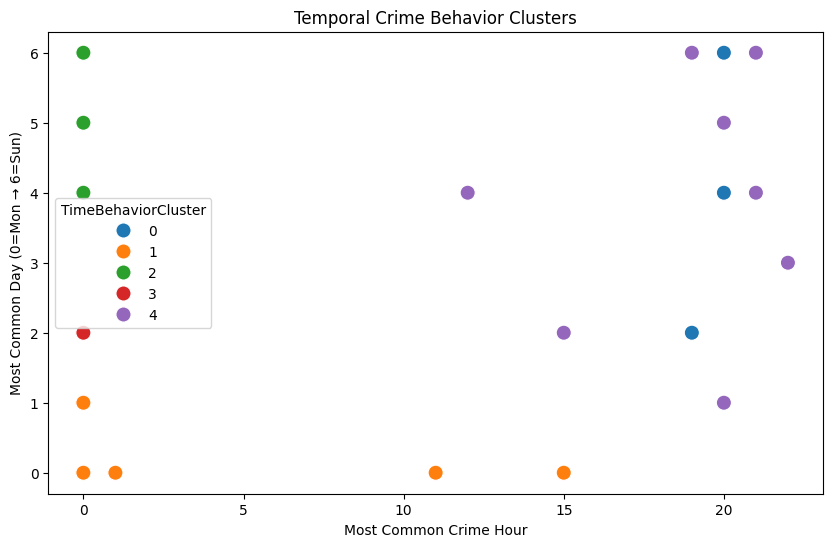

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    x=crime_time_features['Hour_raw'],
    y=crime_time_features['Day_raw'],
    hue=crime_time_features['TimeBehaviorCluster'],
    palette='tab10',
    s=120
)

plt.title("Temporal Crime Behavior Clusters")
plt.xlabel("Most Common Crime Hour")
plt.ylabel("Most Common Day (0=Mon → 6=Sun)")
plt.show()


In [75]:
# Mapping dictionaries
day_map = {0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}
month_map = {
    1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",
    7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"
}

# Create readable labels
profile_summary = crime_time_features.groupby('TimeBehaviorCluster')[['Hour_raw','Day_raw','Month_raw']].agg(get_mode)

profile_summary['Peak Hour']  = profile_summary['Hour_raw']
profile_summary['Peak Day']   = profile_summary['Day_raw'].map(day_map)
profile_summary['Peak Month'] = profile_summary['Month_raw'].map(month_map)

# Use your Season column by selecting most common season per crime type cluster
season_mode = df.groupby('Primary Type')['Season'].agg(get_mode)
crime_time_features['Season'] = crime_time_features.index.map(season_mode)

profile_summary['Season'] = crime_time_features.groupby('TimeBehaviorCluster')['Season'].agg(get_mode)

# Drop raw values and show final table
profile_summary = profile_summary[['Peak Hour','Peak Day','Peak Month','Season']]
profile_summary


,Peak Hour,Peak Day,Peak Month,Season
TimeBehaviorCluster,,,,
0,20,Wed,Mar,Winter
1,0,Mon,Jul,Summer
2,0,Sun,Jul,Summer
3,0,Mon,Mar,Spring
4,20,Fri,Jul,Summer


In [76]:
crime_groups = crime_time_features.groupby("TimeBehaviorCluster").apply(lambda x: list(x.index))
final_profiles = profile_summary.copy()
final_profiles["Crimes Included"] = final_profiles.index.map(lambda c: crime_groups[c])
def label_pattern(row):
    h = row['Peak Hour']

    if h >= 21 or h <= 2:
        return "Late-Night High-Risk Crime Pattern"
    elif 17 <= h < 21:
        return "Evening Rush-Hour Crime Pattern"
    elif 8 <= h < 17:
        return "Daytime Activity Crime Pattern"
    else:
        return "Early Morning Opportunistic Crime Pattern"

final_profiles["Pattern Type"] = final_profiles.apply(label_pattern, axis=1)
final_profiles



C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_21636\1347795361.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  crime_groups = crime_time_features.groupby("TimeBehaviorCluster").apply(lambda x: list(x.index))


,Peak Hour,Peak Day,Peak Month,Season,Crimes Included,Pattern Type
TimeBehaviorCluster,,,,,,
0,20,Wed,Mar,Winter,"[LIQUOR LAW VIOLATION, NARCOTICS, OBSCENITY]",Evening Rush-Hour Crime Pattern
1,0,Mon,Jul,Summer,"[ARSON, ASSAULT, KIDNAPPING, PUBLIC INDECENCY,...",Late-Night High-Risk Crime Pattern
2,0,Sun,Jul,Summer,"[BATTERY, BURGLARY, CONCEALED CARRY LICENSE VI...",Late-Night High-Risk Crime Pattern
3,0,Mon,Mar,Spring,"[DECEPTIVE PRACTICE, HUMAN TRAFFICKING, INTIMI...",Late-Night High-Risk Crime Pattern
4,20,Fri,Jul,Summer,"[CRIMINAL TRESPASS, GAMBLING, INTERFERENCE WIT...",Evening Rush-Hour Crime Pattern


In [10]:
import mlflow
import mlflow.sklearn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ------------------------------
# 1️⃣ Load & Sample Data
# ------------------------------
df = pd.read_csv("Crimes_2023_to_Present_2025_enhanced.csv").sample(20000, random_state=42)

# Extract mode (used later)
def get_mode(series):
    return series.mode().iloc[0]

# ------------------------------
# 2️⃣ Create Crime Time Profile Dataset
# ------------------------------
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['IsWeekend'] = df['Day'].apply(lambda x: 1 if x >= 5 else 0)

# Create temporal feature summary per crime type
crime_time_features = df.groupby('Primary Type')[['Hour','Day','Month','IsWeekend']].agg(get_mode)

# Store raw values before scaling
crime_time_features['Hour_raw'] = crime_time_features['Hour']
crime_time_features['Day_raw'] = crime_time_features['Day']
crime_time_features['Month_raw'] = crime_time_features['Month']

# ------------------------------
# 3️⃣ Scaling
# ------------------------------
scaler = StandardScaler()
crime_scaled = scaler.fit_transform(crime_time_features[['Hour','Day','Month','IsWeekend']])

# ------------------------------
# 4️⃣ MLflow Experiment Tracking
# ------------------------------
mlflow.set_experiment("Crime Clustering Experiment")

best_k = None
best_score = -1
best_model = None

for k in range(3, 6):
    
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = model.fit_predict(crime_scaled)

        sil = silhouette_score(crime_scaled, labels)


        if sil > best_score:
            best_score = sil
            best_k = k
            best_model = model

print(f"\nBest Temporal K: {best_k}, Silhouette Score: {best_score:.3f}")

# ------------------------------
# 5️⃣ Assign Best Model Labels
# ------------------------------
crime_time_features['TimeBehaviorCluster'] = best_model.predict(crime_scaled)

with mlflow.start_run(run_name=f"TimeBehavior_KMeans ({best_k} clusters)"):

    mlflow.log_param("Best_K", best_k)
    mlflow.log_metric("Best_Silhouette", best_score)
    mlflow.sklearn.log_model(best_model, "Best_TimeBehavior_Model")

# ------------------------------
# 6️⃣ Build Human-Friendly Behavior Profiles
# ------------------------------

# Mapping dictionaries
day_map = {0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}
month_map = {
    1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",
    7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"
}

profile_summary = crime_time_features.groupby('TimeBehaviorCluster')[['Hour_raw','Day_raw','Month_raw']].agg(get_mode)

profile_summary['Peak Hour']  = profile_summary['Hour_raw']
profile_summary['Peak Day']   = profile_summary['Day_raw'].map(day_map)
profile_summary['Peak Month'] = profile_summary['Month_raw'].map(month_map)

# Add season from dataset
season_mode = df.groupby('Primary Type')['Season'].agg(get_mode)
crime_time_features['Season'] = crime_time_features.index.map(season_mode)
profile_summary['Season'] = crime_time_features.groupby('TimeBehaviorCluster')['Season'].agg(get_mode)

# Crime lists per cluster
crime_groups = crime_time_features.groupby("TimeBehaviorCluster").apply(lambda x: list(x.index))

profile_summary["Crimes Included"] = profile_summary.index.map(lambda c: crime_groups[c])

# Pattern labeling function
def label_pattern(row):
    h = row['Peak Hour']
    if h >= 21 or h <= 2:
        return "Late-Night High-Risk Pattern"
    elif 17 <= h < 21:
        return "Evening Rush-Hour Pattern"
    elif 8 <= h < 17:
        return "Daytime Activity Pattern"
    else:
        return "Early Morning Opportunistic Pattern"

profile_summary["Pattern Type"] = profile_summary.apply(label_pattern, axis=1)

print("\n📌 FINAL TIME-BASED CRIME PATTERNS:\n")
display(profile_summary)


2025/12/03 18:37:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



Best Temporal K: 5, Silhouette Score: 0.375


2025/12/03 18:37:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_31776\4018687169.py:98: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  crime_groups = crime_time_features.groupby("TimeBehaviorCluster").apply(lambda x: list(x.index))



📌 FINAL TIME-BASED CRIME PATTERNS:



,Hour_raw,Day_raw,Month_raw,Peak Hour,Peak Day,Peak Month,Season,Crimes Included,Pattern Type
TimeBehaviorCluster,,,,,,,,,
0,0,5,7,0,Sat,Jul,Summer,"[CRIMINAL DAMAGE, OTHER OFFENSE, SEX OFFENSE]",Late-Night High-Risk Pattern
1,13,5,4,13,Sat,Apr,Summer,"[BATTERY, CONCEALED CARRY LICENSE VIOLATION, L...",Daytime Activity Pattern
2,16,0,7,16,Mon,Jul,Summer,"[ASSAULT, HOMICIDE, INTERFERENCE WITH PUBLIC O...",Daytime Activity Pattern
3,0,2,2,0,Wed,Feb,Spring,"[ARSON, BURGLARY, CRIMINAL SEXUAL ASSAULT, CRI...",Late-Night High-Risk Pattern
4,20,3,9,20,Thu,Sep,Fall,"[GAMBLING, MOTOR VEHICLE THEFT, NARCOTICS, PRO...",Evening Rush-Hour Pattern


dimensionality reduction

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Select numeric columns
features = [
    'Latitude','Longitude','Beat','District','Ward','Community Area','Hour',
    'CrimeSeverity'
]

X = df[features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

# Variance explained
variance = np.round(pca.explained_variance_ratio_ * 100, 2)
print("Variance per component:", variance)
print("Total variance explained by first 3:", sum(variance[:3]), "%")


Variance per component: [50.26 12.67 12.44]
Total variance explained by first 3: 75.37 %


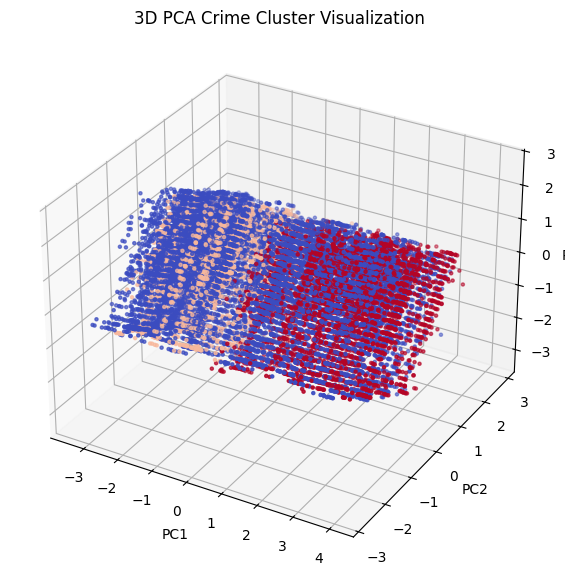

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]
df['PCA3'] = pca_result[:,2]
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['DistrictCluster'], cmap='coolwarm', s=5)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D PCA Crime Cluster Visualization")
plt.show()


2025/12/03 18:39:54 INFO mlflow.tracking.fluent: Experiment with name 'Dimentionality Reduction' does not exist. Creating a new experiment.
2025/12/03 18:39:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/03 18:39:54 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Variance per component: [50.26 12.67 12.44]
Total variance explained: 75.37 %


2025/12/03 18:39:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


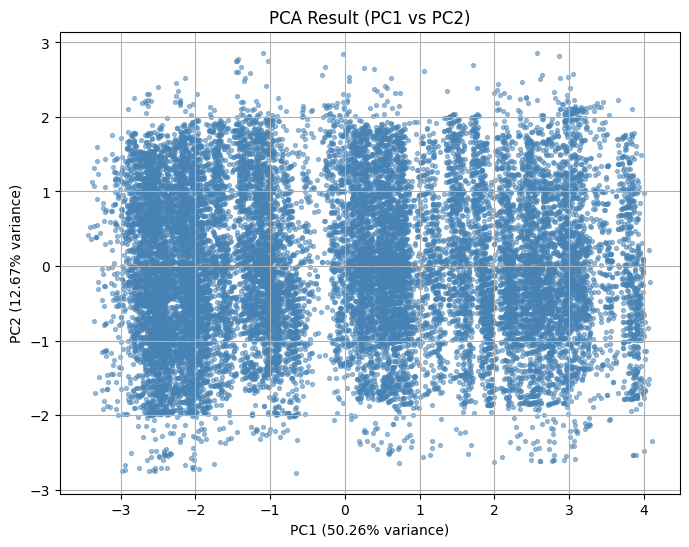


📌 PCA experiment successfully logged in MLflow.


In [11]:
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df = pd.read_csv("Crimes_2023_to_Present_2025_enhanced.csv").sample(20000, random_state=42)
# ------------------------------
# 1️⃣ Select Numeric Features for Dimensionality Reduction
# ------------------------------
features = [
    'Latitude','Longitude','Beat','District','Ward',
    'Community Area','Hour','CrimeSeverity'
]

X = df[features]

# ------------------------------
# 2️⃣ Standardize Features
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 3️⃣ MLflow Experiment Setup
# ------------------------------
mlflow.set_experiment("Dimentionality Reduction")

n_components = 3

with mlflow.start_run(run_name=f"PCA_{n_components}_Components"):

    # ------------------------------
    # Apply PCA
    # ------------------------------
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(X_scaled)

    # Variance ratio
    variance = np.round(pca.explained_variance_ratio_ * 100, 2)
    total_variance = round(sum(variance), 2)

    print("Variance per component:", variance)
    print("Total variance explained:", total_variance, "%")

    # ------------------------------
    # Store Results in DataFrame
    # ------------------------------
    df['PCA1'] = pca_result[:, 0]
    df['PCA2'] = pca_result[:, 1]
    df['PCA3'] = pca_result[:, 2]

    # ------------------------------
    # MLflow Logging
    # ------------------------------
    mlflow.log_param("method", "PCA")
    mlflow.log_param("n_components", n_components)

    # Log metrics
    mlflow.log_metric("PC1_variance", variance[0])
    mlflow.log_metric("PC2_variance", variance[1])
    mlflow.log_metric("PC3_variance", variance[2])
    mlflow.log_metric("total_variance_explained", total_variance)

    # Log model
    mlflow.sklearn.log_model(pca, "PCA_Model")

    # ------------------------------
    # Visualize PCA Output (Scatter for 2D)
    # ------------------------------
    plt.figure(figsize=(8,6))
    plt.scatter(df['PCA1'], df['PCA2'], s=8, c='steelblue', alpha=0.5)
    plt.title("PCA Result (PC1 vs PC2)")
    plt.xlabel(f"PC1 ({variance[0]}% variance)")
    plt.ylabel(f"PC2 ({variance[1]}% variance)")
    plt.grid(True)

    # Save image
    plt.savefig("PCA_Scatter.png")
    mlflow.log_artifact("PCA_Scatter.png")
    plt.show()

print("\n📌 PCA experiment successfully logged in MLflow.")


umap

In [5]:
import pandas as pd

df = pd.read_csv("Crimes_2023_to_Present_2025_enhanced.csv").sample(20000, random_state=42)
# ---- Extract datetime components ----
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.dayofweek       # 0=Mon, 6=Sun
df['Month'] = df['Date'].dt.month
df['IsWeekend'] = df['Day'].apply(lambda x: 1 if x>=5 else 0)
features_for_umap = [
    'Latitude','Longitude','Hour','Day','Month',
    'CrimeSeverity','DistrictCluster'
]

X_umap = df[features_for_umap]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_umap)
import umap

umap_model = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    metric='euclidean',
    random_state=42
)

umap_2d = umap_model.fit_transform(X_scaled)

df['UMAP1'] = umap_2d[:,0]
df['UMAP2'] = umap_2d[:,1]




c:\Projects\patroll2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Projects\patroll2\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


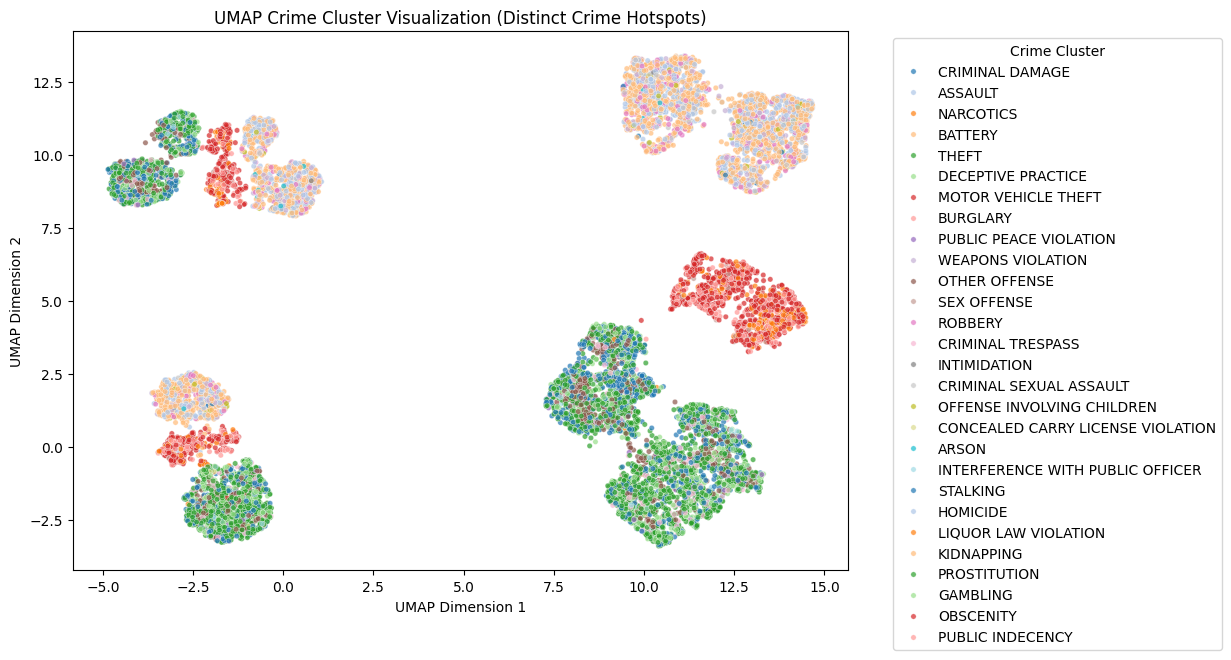

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df.sample(15000, random_state=42),
    x='UMAP1', y='UMAP2',
    hue='Primary Type',   # <--- YOUR CRIME CLUSTER COLUMN
    palette='tab20',
    s=15,
    alpha=0.7
)

plt.title("UMAP Crime Cluster Visualization (Distinct Crime Hotspots)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Crime Cluster", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()


In [1]:
import pandas as pd
df = pd.read_csv("Crimes_2023_to_Present_2025_enhanced.csv").sample(20000, random_state=42)
# ---- Extract datetime components ----
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.dayofweek       # 0=Mon, 6=Sun
df['Month'] = df['Date'].dt.month
df['IsWeekend'] = df['Day'].apply(lambda x: 1 if x>=5 else 0)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

scaler = StandardScaler()
X_geo =scaler.fit_transform(df[['Latitude', 'Longitude']]) #since clustering works best on numpy array

# 3. Apply DBSCAN
db = DBSCAN(
    eps=0.05,            # adjust this
    min_samples=72     # adjust based on density
)
labels = db.fit_predict(X_geo)

# 4. Store labels
mask = labels != -1
df['DBSCAN_cluster'] = labels
sil = silhouette_score(X_geo[mask], labels[mask])
db = davies_bouldin_score(X_geo[mask], labels[mask])
print(f"DBSCAN | Silhouette = {sil:.3f} | Davies-Bouldin = {db:.3f}")


DBSCAN | Silhouette = 0.623 | Davies-Bouldin = 0.271


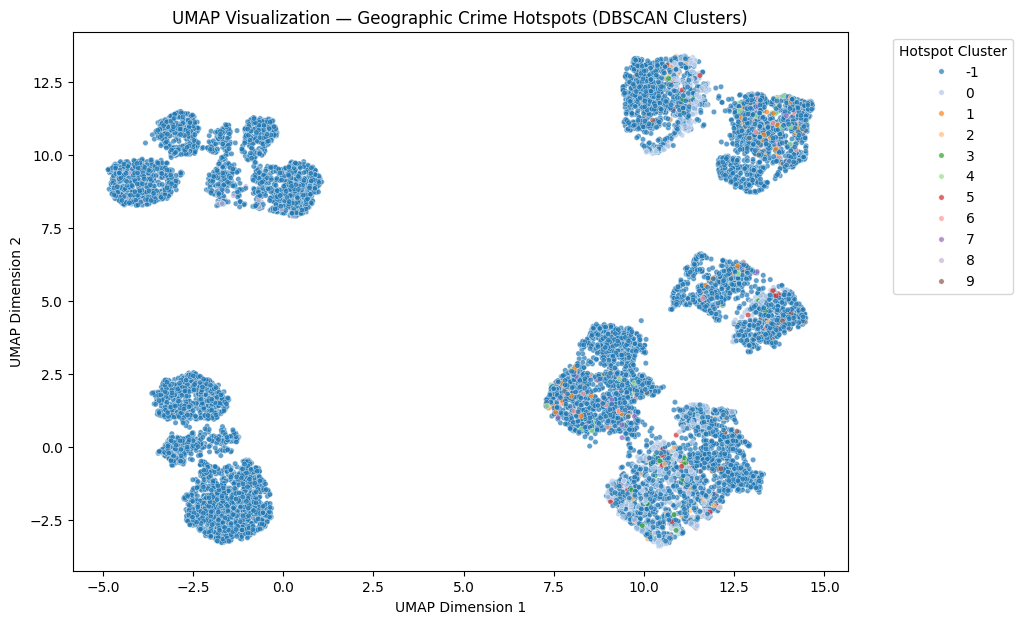

In [8]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df.sample(15000, random_state=42),
    x='UMAP1', y='UMAP2',
    hue='DBSCAN_cluster',  # <── Geographic clusters
    palette='tab20',
    s=15,
    alpha=0.7
)

plt.title("UMAP Visualization — Geographic Crime Hotspots (DBSCAN Clusters)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Hotspot Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [20]:
import mlflow.pyfunc

class UMAPModelWrapper(mlflow.pyfunc.PythonModel):

    def __init__(self, scaler, umap_model):
        self.scaler = scaler
        self.umap_model = umap_model

    def predict(self, context, X):
        X_scaled = self.scaler.transform(X)
        embedding = self.umap_model.transform(X_scaled)
        return embedding


c:\Projects\patroll2\.venv\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:155: FutureWarning: Model's `predict` method contains invalid parameters: {'X'}. Only the following parameter names are allowed: context, model_input, and params. Note that invalid parameters will no longer be permitted in future versions.
  param_names = _check_func_signature(func, "predict")
c:\Projects\patroll2\.venv\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


In [21]:
import mlflow
import time

mlflow.set_experiment(experiment_id="235084936605049055")

with mlflow.start_run(run_name="UMAP_Model"):

    start_time = time.time()

    # Log parameters
    mlflow.log_param("n_neighbors", 30)
    mlflow.log_param("min_dist", 0.1)
    mlflow.log_param("metric", "euclidean")
    mlflow.log_param("features_used", features_for_umap)

    # Fit (already done earlier, so we reuse umap_model and scaler)
    umap_embedding = umap_model.fit_transform(X_scaled)
    df["UMAP1"], df["UMAP2"] = umap_embedding[:,0], umap_embedding[:,1]

    mlflow.log_metric("runtime_sec", round(time.time() - start_time, 2))

    # Log approximate trustworthiness
    mlflow.log_metric("trustworthiness_score", umap_model.embedding_.shape[0] / len(X_scaled))

    # ---- Log as MLflow model ----
    mlflow.pyfunc.log_model(
        artifact_path="UMAP_Model",
        python_model=UMAPModelWrapper(scaler, umap_model)
    )

    print("\n✨ UMAP Model Logged Successfully")


2025/12/03 20:37:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/03 20:37:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



✨ UMAP Model Logged Successfully


In [ ]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"   



fig = px.scatter_3d(
    df,
    x='PCA1', y='PCA2', z='PCA3',
    color='Primary Type',   # <--- YOUR CRIME CLUSTER COLUMN,
    hover_data=['Primary Type','District','Season'],
    title="Interactive 3D PCA Crime Cluster Visualization",
    opacity=0.75
)

fig.update_traces(marker=dict(size=3))
fig.show()


In [ ]:
import numpy as np
import pandas as pd

# Loadings = how strongly each feature contributes to PC1, PC2, PC3
loadings = pca.components_.T[:, :3]  # Top 3 PCs

feature_importance = pd.DataFrame({
    'Feature':X .columns,
    'PC1_Impact': np.abs(loadings[:, 0]),
    'PC2_Impact': np.abs(loadings[:, 1]),
    'PC3_Impact': np.abs(loadings[:, 2])
})

feature_importance['Total_Impact'] = feature_importance[['PC1_Impact','PC2_Impact','PC3_Impact']].sum(axis=1)
feature_importance = feature_importance.sort_values(by='Total_Impact', ascending=False)

print(feature_importance.head(10))


          Feature  PC1_Impact  PC2_Impact  PC3_Impact  Total_Impact
6            Hour    0.000965    0.588340    0.801791      1.391095
7   CrimeSeverity    0.047988    0.781796    0.535067      1.364852
1       Longitude    0.329612    0.152527    0.152275      0.634414
5  Community Area    0.349321    0.108925    0.157520      0.615766
3        District    0.447620    0.052163    0.087086      0.586870
2            Beat    0.447282    0.052216    0.087289      0.586787
0        Latitude    0.437391    0.045244    0.084043      0.566678
4            Ward    0.418677    0.005233    0.023838      0.447748


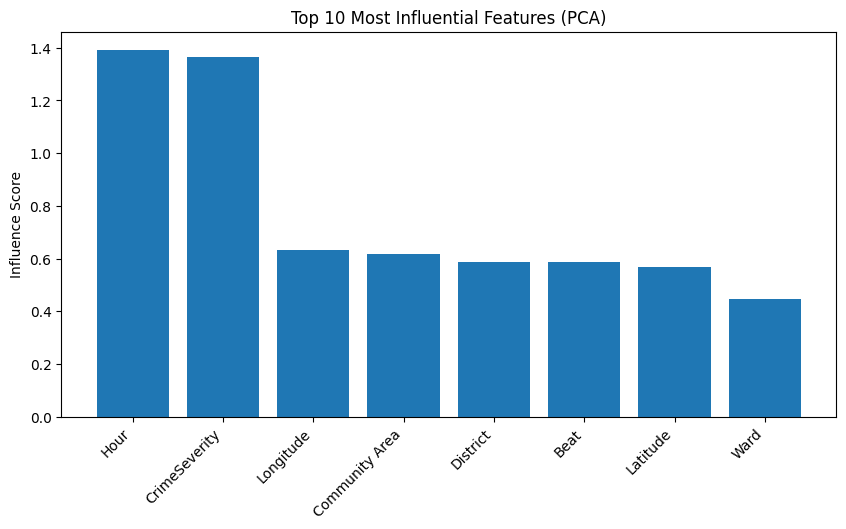

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(feature_importance['Feature'][:10], feature_importance['Total_Impact'][:10])
plt.title("Top 10 Most Influential Features (PCA)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Influence Score")
plt.show()


In [29]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

model_name = "DBSCAN_Model"

try:
    client.create_registered_model(model_name)
    print("📌 Registered model name created successfully.")
except Exception as e:
    print(f"⚠️ Model may already exist: {e}")


📌 Registered model name created successfully.


In [30]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

experiment_id = "778555681162698640"
run_id = "b89e4252e3b94c8d8740002107c7fbf8"

# Folder name where your MLmodel file exists
artifact_dir = "models/m-a441d6008f6646fe9fb422416237067a/artifacts"

model_name = "DBSCAN_Model"  # name you want in MLflow registry

model_version = client.create_model_version(
    name=model_name,
    source=f"mlruns/{experiment_id}/{artifact_dir}",
    run_id=run_id
)

print(f"🎉 Registered Successfully → Version: {model_version.version}")


🎉 Registered Successfully → Version: 1


In [31]:
from mlflow.tracking import MlflowClient


client = MlflowClient()

model_name = "Best_Temporal_KMeans_Model"

try:
    client.create_registered_model(model_name)
    print("📌 Registered model name created successfully.")
except Exception as e:
    print(f"⚠️ Model may already exist: {e}")



📌 Registered model name created successfully.


In [32]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
run_id = "d1d65fb06f084b9aad85a3b0fccdf75e"
experiment_id = "512300659662285894"
artifact_dir = "models/m-c54e958026ed4da7a68a8e0d698ce8b4/artifacts" # must match folder name inside artifacts

model_name = "Best_Temporal_KMeans_Model"  # same name as shown in MLflow UI

# Register the model
model_version = client.create_model_version(
    name=model_name,
    source=f"mlruns/{experiment_id}/{artifact_dir}",
    run_id=run_id
)

print(f"Model registered successfully → Version: {model_version.version}")


Model registered successfully → Version: 1


In [33]:

from mlflow.tracking import MlflowClient

client = MlflowClient()

model_name = "Best_TimeBehavior_Model"  # must match exact name

# Create the registered model (only needed once)
client.create_registered_model(model_name)

print("Model entry created in registry.")

Model entry created in registry.


In [34]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

run_id = "d9788b0e98d243b2b0e1c977773b68a0"
experiment_id = "512300659662285894"
artifact_dir = "models/m-70b080ee0da34054a1c3284796f716ac/artifacts" # must match folder name inside artifacts

model_name = "Best_TimeBehavior_Model"  # same name as shown in MLflow UI

# Register the model
model_version = client.create_model_version(
    name=model_name,
    source=f"mlruns/{experiment_id}/{artifact_dir}",
    run_id=run_id
)

print(f"Model registered successfully → Version: {model_version.version}")


Model registered successfully → Version: 1


In [35]:


from mlflow.tracking import MlflowClient

client = MlflowClient()

model_name = "PCA_Model"  # must match exact name

# Create the registered model (only needed once)
client.create_registered_model(model_name)

print("Model entry created in registry.")

Model entry created in registry.


In [36]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
run_id = "8e5d9a6965444e618b59a4eb153f521a"
experiment_id = "235084936605049055"
artifact_dir = "models/m-30d3c10a872940019ad0669b254178f9/artifacts" # must match folder name inside artifacts

model_name = "PCA_Model"  # same name as shown in MLflow UI

# Register the model
model_version = client.create_model_version(
    name=model_name,
    source=f"mlruns/{experiment_id}/{artifact_dir}",
    run_id=run_id
)

print(f"Model registered successfully → Version: {model_version.version}")


Model registered successfully → Version: 1


In [37]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

client.create_registered_model("UMAP_Model")
run_id='e01568dad8654da2aec2152c361a3b5a'
experiment_id = "235084936605049055"
artifact_dir = "models/m-72469aca0fa549a380c702d54085417e/artifacts"
model_version = client.create_model_version(
    name="UMAP_Model",
    source=f"mlruns/{experiment_id}/{artifact_dir}",
    run_id=run_id
)

print(f"UMAP registered → version {model_version.version}")


UMAP registered → version 1


In [1]:
import pandas as pd
import folium

# -------------------------
# LOAD DATA
# -------------------------
df = pd.read_csv("Crimes_2023_to_Present_2025_enhanced.csv").sample(20000, random_state=42)

# -------------------------
# GROUP BY SAME LAT & LON AND COUNT CRIMES
# -------------------------
crime_count = (
    df.groupby(["Latitude", "Longitude"])
      .size()
      .reset_index(name="CrimeCount")
      .sort_values("CrimeCount", ascending=False)
)

# Get Top 5 highest crime locations
top5 = crime_count.head(5)
top5


,Latitude,Longitude,CrimeCount
10232,41.883500,-87.627877,34
5508,41.788987,-87.741480,19
8833,41.868542,-87.639235,18
11287,41.895003,-87.621528,18
15540,41.976290,-87.905227,17


In [2]:
# -------------------------
# BASE MAP
# -------------------------
center_lat = df["Latitude"].mean()
center_lon = df["Longitude"].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

# -------------------------
# ADD TOP 5 CRIME HOTSPOT CIRCLES
# -------------------------
for _, row in top5.iterrows():
    folium.Circle(
        location=[row["Latitude"], row["Longitude"]],
        radius=row["CrimeCount"] * 5,   # bigger radius = more crimes
        color="red",
        fill=True,
        fill_opacity=0.5,
        popup=f"🔥 Crimes: {row['CrimeCount']}<br>📍 ({row['Latitude']}, {row['Longitude']})",
    ).add_to(m)

output_path = "Top5_CrimeHotspots.html"
m.save(output_path)

print(f"✔ Map saved as: {output_path}")



✔ Map saved as: Top5_CrimeHotspots.html
